In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv(r"C:\Users\luke\Documents\data1030\data1030-project\healthcare-dataset-stroke-data.csv")

df = df.dropna()
df.drop('id', axis = 1, inplace = True)
df.head(10)

gender   age  hypertension  heart_disease ever_married      work_type  \
0     Male  67.0             0              1          Yes        Private   
2     Male  80.0             0              1          Yes        Private   
3   Female  49.0             0              0          Yes        Private   
4   Female  79.0             1              0          Yes  Self-employed   
5     Male  81.0             0              0          Yes        Private   
6     Male  74.0             1              1          Yes        Private   
7   Female  69.0             0              0           No        Private   
9   Female  78.0             0              0          Yes        Private   
10  Female  81.0             1              0          Yes        Private   
11  Female  61.0             0              1          Yes       Govt_job   

   Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0           Urban             228.69  36.6  formerly smoked       1  
2           Rural             105.92  32.5     never smoked       1  
3           Urban             171.23  34.4           smokes       1  
4           Rural             174.12  24.0     never smoked       1  
5           Urban             186.21  29.0  formerly smoked       1  
6           Rural              70.09  27.4     never smoked       1  
7           Urban              94.39  22.8     never smoked       1  
9           Urban              58.57  24.2          Unknown       1  
10          Rural              80.43  29.7     never smoked       1  
11          Rural             120.46  36.8           smokes       1

In [195]:
!pip list

Package                       Version
----------------------------- ---------
anyio                         3.3.0
argon2-cffi                   20.1.0
async-generator               1.10
attrs                         21.2.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
bleach                        4.1.0
brotlipy                      0.7.0

The system cannot find the path specified.



certifi                       2021.5.30
cffi                          1.14.6
chardet                       4.0.0
click                         8.0.3
cloudpickle                   2.0.0
colorama                      0.4.4
cryptography                  3.4.7
cycler                        0.10.0
debugpy                       1.4.1
decorator                     5.0.9
defusedxml                    0.7.1
entrypoints                   0.3
et-xmlfile                    1.1.0
idna                          2.10
imbalanced-learn              0.8.1
importlib-metadata            4.8.1
ipykernel                     6.4.0
ipython                       7.27.0
ipython-genutils              0.2.0
jdcal                         1.4.1
jedi                          0.18.0
Jinja2                        3.0.1
joblib                        1.0.1
json5                         0.9.5
jsonschema                    3.2.0
jupyter-client                7.0.2
jupyter-core                  4.7.1
jupyter-http-over-ws  

In [29]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [30]:
import math
df.stroke.value_counts()



0    4700
1     209
Name: stroke, dtype: int64

In [31]:
df.work_type.value_counts()

Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

In [32]:
df.gender.value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

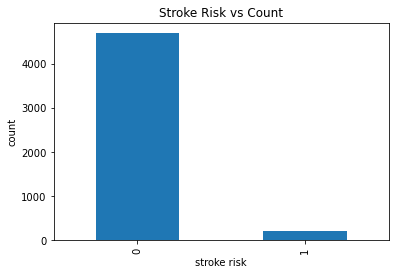

In [33]:
pd.value_counts(df['stroke']).plot.bar()
plt.ylabel('count')
plt.xlabel('stroke risk')
plt.title('Stroke Risk vs Count')
plt.show()


AGE

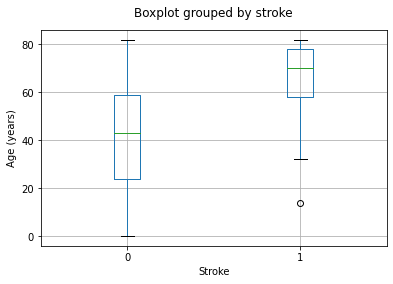

In [34]:
df[['age','stroke']].boxplot(by='stroke')
plt.ylabel('Age (years)')
plt.xlabel("Stroke")
plt.title(" ")
plt.show()

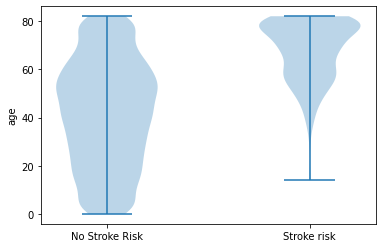

In [35]:
dataset = [df[df['stroke']== 0]['age'].values,
           df[df['stroke']== 1]['age'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],["No Stroke Risk", "Stroke risk"])
plt.ylabel('age')
plt.show()

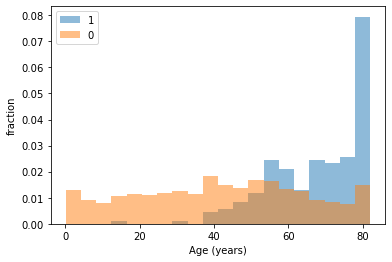

In [36]:

categories = df['stroke'].unique()
bin_range = (df['age'].min(),df['age'].max())

for c in categories:
    plt.hist(df[df['stroke']==c]['age'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('Age (years)')

plt.show()

WORK TYPE

stroke              0      1
work_type                   
Govt_job        602.0   28.0
Never_worked     22.0    NaN
Private        2684.0  127.0
Self-employed   722.0   53.0
children        670.0    1.0
stroke                0         1
work_type                        
Govt_job       0.955556  0.044444
Never_worked   1.000000       NaN
Private        0.954820  0.045180
Self-employed  0.931613  0.068387
children       0.998510  0.001490


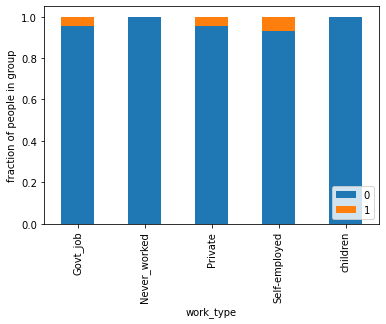

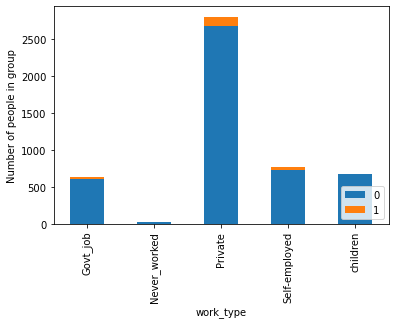

In [37]:
count_matrix = df.groupby(['work_type', 'stroke']).size().unstack()
print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.show()

count_matrix.plot(kind='bar', stacked=True)
plt.ylabel('Number of people in group')
plt.legend(loc=4)
plt.show()

SMOKING STATUS

stroke              0   1
smoking_status           
Unknown          1454  29
formerly smoked   780  57
never smoked     1768  84
smokes            698  39
stroke                  0         1
smoking_status                     
Unknown          0.980445  0.019555
formerly smoked  0.931900  0.068100
never smoked     0.954644  0.045356
smokes           0.947083  0.052917


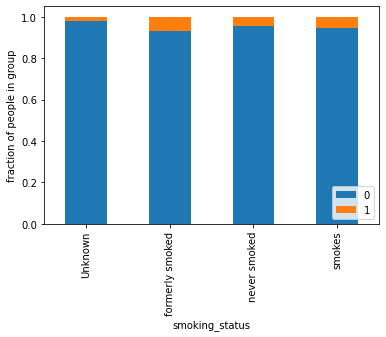

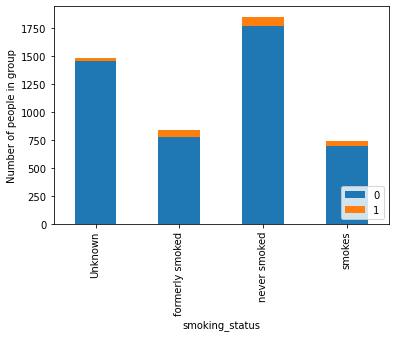

In [38]:
count_matrix = df.groupby(['smoking_status', 'stroke']).size().unstack()
print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.show()

count_matrix.plot(kind='bar', stacked=True)
plt.ylabel('Number of people in group')
plt.legend(loc=4)
plt.show()

HEART DISEASE

stroke            0    1
heart_disease           
0              4497  169
1               203   40
stroke                0         1
heart_disease                    
0              0.963781  0.036219
1              0.835391  0.164609


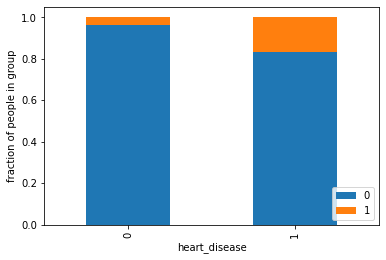

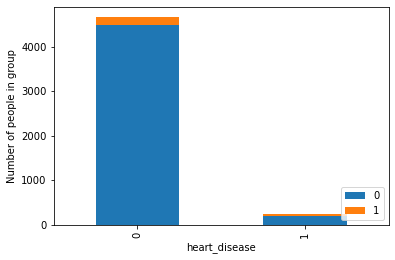

In [39]:
count_matrix = df.groupby(['heart_disease', 'stroke']).size().unstack()
print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('fraction of people in group')
plt.legend(loc=4)
plt.show()

count_matrix.plot(kind='bar', stacked=True)
plt.ylabel('Number of people in group')
plt.legend(loc=4)
plt.show()

AVERAGE GLUCOSE LEVEL

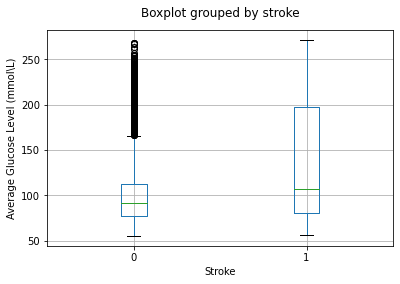

In [40]:
df[['avg_glucose_level','stroke']].boxplot(by='stroke')
plt.ylabel('Average Glucose Level (mmol\L)')
plt.xlabel("Stroke")
plt.title(" ")
plt.show()

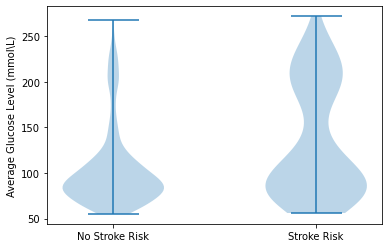

In [41]:
dataset = [df[df['stroke']== 0]['avg_glucose_level'].values,
           df[df['stroke']== 1]['avg_glucose_level'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],["No Stroke Risk", "Stroke Risk"])
plt.ylabel('Average Glucose Level (mmol\L)')
plt.show()

BODY MASS INDEX

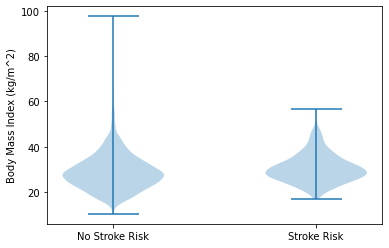

In [42]:
dataset = [df[df['stroke']== 0]['bmi'].values,
           df[df['stroke']== 1]['bmi'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2],["No Stroke Risk", "Stroke Risk"])
plt.ylabel('Body Mass Index (kg/m^2)')
plt.show()

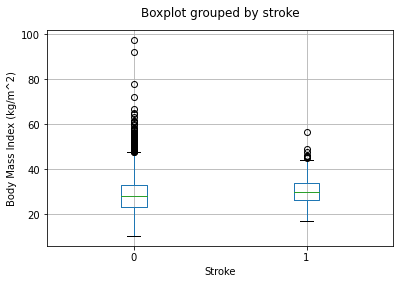

In [43]:
df[['bmi','stroke']].boxplot(by='stroke')
plt.ylabel('Body Mass Index (kg/m^2)')
plt.xlabel("Stroke")
plt.title(" ")
plt.show()

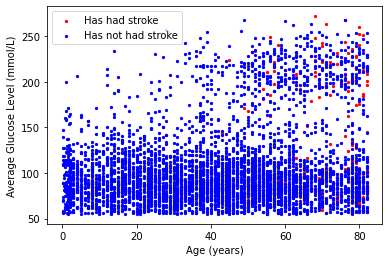

In [44]:
colors = np.where(df['stroke'] == 1, 'r', 'b')
scat1 = df[df['stroke'] ==1].plot.scatter('age', 'avg_glucose_level',s=5, c = 'r') # alpha=0.1,s=10
scat2 = df[df['stroke'] == 0].plot.scatter('age', 'avg_glucose_level', s=5, ax = scat1, c = 'b')
plt.legend(['Has had stroke', 'Has not had stroke'])
plt.ylabel('Average Glucose Level (mmol/L)')
plt.xlabel('Age (years)')
plt.show()

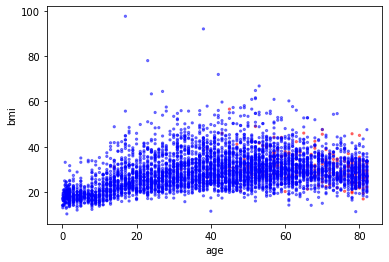

In [45]:
colors = np.where(df['stroke'] == 1, 'r', 'b')
df.plot.scatter('age','bmi',s=5,alpha=0.5, c = colors) # alpha=0.1,s=10

plt.show()

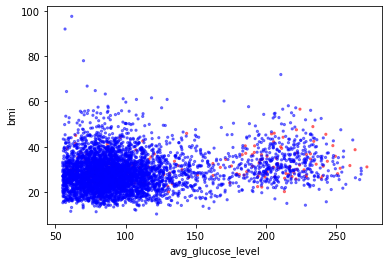

In [46]:
colors = np.where(df['stroke'] == 1, 'r', 'b')
df.plot.scatter('avg_glucose_level','bmi',s=5,alpha=0.5, c = colors) # alpha=0.1,s=10

plt.show()

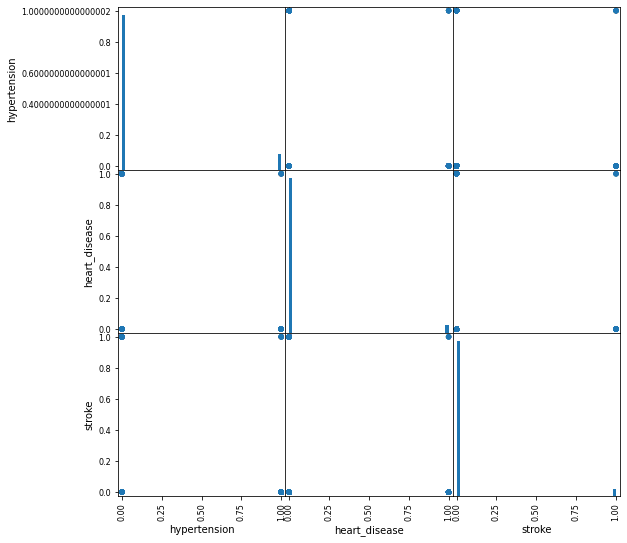

In [47]:
pd.plotting.scatter_matrix(df.select_dtypes(int), figsize=(9, 9), marker='o',hist_kwds={'bins': 50}, 
                           s=30, alpha=.1)
plt.show()

## Packages

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score, f1_score, make_scorer, classification_report
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RepeatedStratifiedKFold, ParameterGrid
from sklearn.preprocessing import OneHotEncoder, StandardScaler 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn.svm import SVC
import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)


In [137]:
df.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   
5    Male  81.0             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
2          Rural             105.92  32.5     never smoked       1  
3          Urban             171.23  34.4           smokes       1  
4          Rural             174.12  24.0     never smoked       1  
5          Urban             186.21  29.0  formerly smoked       1

## Logistic Ridge

In [138]:
y = df['stroke']
X = df.loc[:, df.columns != "stroke"]

std_ftrs = ['age', 'bmi', 'avg_glucose_level']
onehot_ftrs = ['hypertension', 'heart_disease', "work_type", "smoking_status", 'gender', 'ever_married', 'Residence_type']

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('std', StandardScaler(), std_ftrs)])

param_grid = {
              'model__C': np.reciprocal(np.logspace(-5,5,51))
                } 

nr_states = 3
thetas = []
final_models = []

#testing scores
test_ps = np.zeros(nr_states)
test_f1 = np.zeros(nr_states)
test_rc = np.zeros(nr_states)

#validation scores
val_ps = np.zeros(nr_states)
val_f1 = np.zeros(nr_states)
val_rc = np.zeros(nr_states)

#loop over multiple random states.
for i in range(1,nr_states+1):
    steps = [
        ('preprocess', preprocessor),
        ('model', LogisticRegression(penalty = 'l2'))
        ]

    
    pipeline = Pipeline(steps = steps)
    X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=i*42)

    kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=i*42)
    for train_index, val_index in kf.split(X_other,y_other):
        X_train = X_other.iloc[train_index]
        y_train = y_other.iloc[train_index]
        X_val = X_other.iloc[val_index]
        y_val = y_other.iloc[val_index]
        
    grid = GridSearchCV(pipeline, param_grid=param_grid,scoring = make_scorer(f1_score),
                            cv=kf, return_train_score = True, n_jobs=-1, verbose=True)
    grid.fit(X_train, y_train)
    results = pd.DataFrame(grid.cv_results_)


    print('best model parameters:',grid.best_params_)
    print('mean precision score',grid.best_score_) # this is the mean validation score over all iterations
    print('best model index: ', grid.best_index_)
    
    # save the model
    final_models.append(grid)
    
    # calculate and save the test score
    y_test_pred = final_models[-1].predict(X_test)
    y_val_pred = final_models[-1].predict(X_val)
    y_test_proba = final_models[-1].predict_proba(X_test)
    y_proba = final_models[-1].predict_proba(X_val)
    
    test_ps[i - 1] = precision_score(y_test, y_test_pred, zero_division = 0)
    test_f1[i-1] = f1_score(y_test, y_test_pred)
    test_rc[i-1] = recall_score(y_test,y_test_pred)
    
    val_ps[i - 1] = precision_score(y_val, y_val_pred, zero_division = 0)
    val_f1[i-1] = f1_score(y_val,y_val_pred)
    val_rc[i-1] = recall_score(y_val, y_val_pred)
    print("random_state: ", str(42*i))
    print("precision score: ", precision_score(y_test, y_test_pred, zero_division = 0))
    print('f1 score: ', f1_score(y_test, y_test_pred))
    print()
print()
print('test f1 scores: ', test_f1)
print('test precison scores: ', test_ps)
print('validation f1 scores: ', val_f1)
print('validation precision scores: ', val_ps)

Fitting 4 folds for each of 51 candidates, totalling 204 fits
best model parameters: {'model__C': 99999.99999999999}
mean precision score 0.015151515151515152
best model index:  0
random_state:  42
precision score:  0.0
f1 score:  0.0

Fitting 4 folds for each of 51 candidates, totalling 204 fits
best model parameters: {'model__C': 99999.99999999999}
mean precision score 0.030303030303030304
best model index:  0
random_state:  84
precision score:  0.0
f1 score:  0.0

Fitting 4 folds for each of 51 candidates, totalling 204 fits
best model parameters: {'model__C': 99999.99999999999}
mean precision score 0.0
best model index:  0
random_state:  126
precision score:  1.0
f1 score:  0.046511627906976744


test f1 scores:  [0.         0.         0.04651163]
test precison scores:  [0. 0. 1.]
validation f1 scores:  [0.04651163 0.04761905 0.        ]
validation precision scores:  [0.5 1.  0. ]


In [162]:
y = df['stroke']
X = df.loc[:, df.columns != "stroke"]

std_ftrs = ['age', 'bmi', 'avg_glucose_level']
onehot_ftrs = ['hypertension', 'heart_disease', "work_type", "smoking_status", 'gender', 'ever_married', 'Residence_type']

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('std', StandardScaler(), std_ftrs)])


nr_states = 20
thetas = []
final_models = []

#testing scores
test_ps = np.zeros(nr_states)
test_f1 = np.zeros(nr_states)
test_rc = np.zeros(nr_states)

#validation scores
val_ps = np.zeros(nr_states)
val_f1 = np.zeros(nr_states)
val_rc = np.zeros(nr_states)

#loop over multiple random states.
for i in range(1,nr_states+1):
    steps = [
        ('preprocess', preprocessor)
        ]

    
    clf = Pipeline(steps = steps)
    X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=i*42)

    kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=i*42)
    for train_index, val_index in kf.split(X_other,y_other):
        X_train = X_other.iloc[train_index]
        y_train = y_other.iloc[train_index]
        X_val = X_other.iloc[val_index]
        y_val = y_other.iloc[val_index]
    X_train_prep = clf.fit_transform(X_train)
    X_test_prep = clf.transform(X_test)
    X_val_prep = clf.transform(X_val)
    
    clf = LogisticRegression(penalty = 'l2', C = 1/(1^0))
    model = clf.fit(X_train_prep, y_train)
    final_models.append(model)

    # calculate and save the test score
    y_test_pred = final_models[-1].predict(X_test_prep)
    y_val_pred = final_models[-1].predict(X_val_prep)
    y_test_proba = final_models[-1].predict_proba(X_test_prep)
    y_proba = final_models[-1].predict_proba(X_val_prep)
    
    test_ps[i - 1] = precision_score(y_test, y_test_pred, zero_division = 0)
    test_f1[i-1] = f1_score(y_test, y_test_pred)
    test_rc[i-1] = recall_score(y_test,y_test_pred)
    
    val_ps[i - 1] = precision_score(y_val, y_val_pred, zero_division = 0)
    val_f1[i-1] = f1_score(y_val,y_val_pred)
    val_rc[i-1] = recall_score(y_val, y_val_pred)
    print("random_state: ", str(42*i))
    print("precision score: ", precision_score(y_test, y_test_pred, zero_division = 0))
    print('f1 score: ', f1_score(y_test, y_test_pred))
    print()
print()
print('test f1 scores: ', test_f1)
print('validation f1 scores: ', val_f1)
print('test precison scores: ', test_ps)
print('validation precision scores: ', val_ps)

test_ps_mean = np.mean(test_ps)
test_ps_std = np.std(test_ps)
test_f1_mean = np.mean(test_f1)
test_f1_std = np.std(test_f1)

val_ps_mean = np.mean(val_ps)
val_ps_std = np.std(val_ps)
val_f1_mean = np.mean(val_f1)
val_f1_std = np.std(val_f1)
print('test precision mean: ', test_ps_mean)
print('test precision std: ', test_ps_std)
print('test f1 mean: ', test_f1_mean)
print('test f1 std: ', test_f1_std)
print('val precision mean: ', val_ps_mean)
print('val precision std: ', val_ps_std)
print('val f1 mean: ', val_f1_mean)
print('val f1 std: ', val_f1_std)


random_state:  42
precision score:  0.0
f1 score:  0.0

random_state:  84
precision score:  0.0
f1 score:  0.0

random_state:  126
precision score:  1.0
f1 score:  0.046511627906976744

random_state:  168
precision score:  0.0
f1 score:  0.0

random_state:  210
precision score:  0.5
f1 score:  0.04545454545454545

random_state:  252
precision score:  1.0
f1 score:  0.046511627906976744

random_state:  294
precision score:  0.0
f1 score:  0.0

random_state:  336
precision score:  0.0
f1 score:  0.0

random_state:  378
precision score:  0.0
f1 score:  0.0

random_state:  420
precision score:  0.5
f1 score:  0.04545454545454545

random_state:  462
precision score:  1.0
f1 score:  0.046511627906976744

random_state:  504
precision score:  0.0
f1 score:  0.0

random_state:  546
precision score:  0.0
f1 score:  0.0

random_state:  588
precision score:  0.0
f1 score:  0.0

random_state:  630
precision score:  0.0
f1 score:  0.0

random_state:  672
precision score:  0.0
f1 score:  0.0

random_

In [140]:
base_prec = 209/(209+4700) # Considers no stroke (0) as 1 in this calculation. 

base_recall = 209/(209 +0)
print(base_prec, base_recall)
f1_base = 2*(base_prec*base_recall)/(base_prec+base_recall)
print(f1_base)

0.04257486249745366 1.0
0.08167252833137946


In [163]:
test_ps_nstds = abs((base_prec-test_ps_mean)/test_ps_std)
test_f1_nstds = abs((f1_base-test_f1_mean)/test_f1_std)
val_ps_nstds = abs((base_prec-val_ps_mean)/val_ps_std)
val_f1_nstds = abs((f1_base-val_f1_mean)/val_f1_std)

print('test precision # stds: ', test_ps_nstds)
print('test f1 # stds: ', test_f1_nstds)
print('test precision # stds: ', val_ps_nstds)
print('test f1 # stds: ', val_f1_nstds)

test precision # stds:  0.42845695507635406
test f1 # stds:  3.5147721487791705
test precision # stds:  0.5376597103281164
test f1 # stds:  3.1024470659676067


# to do list
- logless pred proba 10^-15 sklearn manual
- use f1 score
- look at kaggle submission
- dont use smote
- add a 4th model SVC


### Random Forest Classifier

In [142]:
y = df['stroke']
X = df.loc[:, df.columns != "stroke"]

std_ftrs = ['age', 'bmi', 'avg_glucose_level']
onehot_ftrs = ['hypertension', 'heart_disease', "work_type", "smoking_status", 'gender', 'ever_married', 'Residence_type']

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('std', StandardScaler(), std_ftrs)])

param_grid = {
              'model__max_depth': np.linspace(1,25,25), # the max_depth should be smaller or equal than the number of features roughly
              'model__max_features': np.linspace(0.5, 1.0, 5) # linearly spaced between 0.5 and 1
              } 

nr_states = 3
final_models = []

#testing scores
test_ps = np.zeros(nr_states)
test_f1 = np.zeros(nr_states)
test_rc = np.zeros(nr_states)

#validation scores
val_ps = np.zeros(nr_states)
val_f1 = np.zeros(nr_states)
val_rc = np.zeros(nr_states)


for i in range(1, nr_states + 1):
    steps = [
        ('preprocess', preprocessor),
        ('model', RandomForestClassifier())
        ]

    pipeline = Pipeline(steps = steps)
    X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=i*42)
    
    kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=i*42)
    for train_index, val_index in kf.split(X_other,y_other):
        X_train = X_other.iloc[train_index]
        y_train = y_other.iloc[train_index]
        X_val = X_other.iloc[val_index]
        y_val = y_other.iloc[val_index]
    
    grid = GridSearchCV(pipeline, param_grid=param_grid,scoring = make_scorer(f1_score),
                            cv=kf, return_train_score = True, n_jobs=-1, verbose=True)
    grid.fit(X_train, y_train)
    results = pd.DataFrame(grid.cv_results_)


    print('best model parameters:',grid.best_params_)
    print('mean precision score',grid.best_score_) # this is the mean validation score over all iterations
    
    # save the model
    final_models.append(grid)
    
    # calculate and save the test score
    y_test_pred = final_models[-1].predict(X_test)
    y_val_pred = final_models[-1].predict(X_val)
    y_test_proba = final_models[-1].predict_proba(X_test)
    y_proba = final_models[-1].predict_proba(X_val)
    
    test_ps[i - 1] = precision_score(y_test, y_test_pred)
    test_f1[i-1] = f1_score(y_test, y_test_pred)
    test_rc[i-1] = recall_score(y_test,y_test_pred)
    
    val_ps[i - 1] = precision_score(y_val, y_val_pred)
    val_f1[i-1] = f1_score(y_val,y_val_pred)
    val_rc[i-1] = recall_score(y_val, y_val_pred)
    print("random_state: ", str(42*i))
    print("precision score: ", precision_score(y_test, y_test_pred))
    print('f1 score: ', f1_score(y_test, y_test_pred))
    print()
print()
print('test f1 scores: ', test_f1)
print('test precison scores: ', test_ps)
print('test recall scores: ', test_rc)
print('validation f1 scores: ', val_f1)
print('validation precision scores: ', val_ps)
print('validation recall scores: ', val_rc)

Fitting 4 folds for each of 125 candidates, totalling 500 fits
best model parameters: {'model__max_depth': 19.0, 'model__max_features': 0.5}
mean precision score 0.07352941176470587
random_state:  42
precision score:  0.0
f1 score:  0.0

Fitting 4 folds for each of 125 candidates, totalling 500 fits
best model parameters: {'model__max_depth': 11.0, 'model__max_features': 0.875}
mean precision score 0.05845216874628639
random_state:  84
precision score:  0.2
f1 score:  0.0425531914893617

Fitting 4 folds for each of 125 candidates, totalling 500 fits
best model parameters: {'model__max_depth': 17.0, 'model__max_features': 0.875}
mean precision score 0.029411764705882353
random_state:  126
precision score:  0.3333333333333333
f1 score:  0.044444444444444446


test f1 scores:  [0.         0.04255319 0.04444444]
test precison scores:  [0.         0.2        0.33333333]
test recall scores:  [0.         0.02380952 0.02380952]
validation f1 scores:  [0.08163265 0.04651163 0.        ]
validati

In [160]:
y = df['stroke']
X = df.loc[:, df.columns != "stroke"]

std_ftrs = ['age', 'bmi', 'avg_glucose_level']
onehot_ftrs = ['hypertension', 'heart_disease', "work_type", "smoking_status", 'gender', 'ever_married', 'Residence_type']

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('std', StandardScaler(), std_ftrs)])


nr_states = 20
thetas = []
final_models = []

#testing scores
test_ps = np.zeros(nr_states)
test_f1 = np.zeros(nr_states)
test_rc = np.zeros(nr_states)

#validation scores
val_ps = np.zeros(nr_states)
val_f1 = np.zeros(nr_states)
val_rc = np.zeros(nr_states)

#loop over multiple random states.
for i in range(1,nr_states+1):
    steps = [
        ('preprocess', preprocessor)
        ]

    
    clf = Pipeline(steps = steps)
    X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=i*42)

    kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=i*42)
    for train_index, val_index in kf.split(X_other,y_other):
        X_train = X_other.iloc[train_index]
        y_train = y_other.iloc[train_index]
        X_val = X_other.iloc[val_index]
        y_val = y_other.iloc[val_index]
    X_train_prep = clf.fit_transform(X_train)
    X_test_prep = clf.transform(X_test)
    X_val_prep = clf.transform(X_val)
    
    # model__max_depth': 20.0, 'model__max_features': 0.5
    clf = RandomForestClassifier(max_depth = 17, max_features = 0.875)
    model = clf.fit(X_train_prep, y_train)
    final_models.append(model)

    # calculate and save the test score
    y_test_pred = final_models[-1].predict(X_test_prep)
    y_val_pred = final_models[-1].predict(X_val_prep)
    y_test_proba = final_models[-1].predict_proba(X_test_prep)
    y_proba = final_models[-1].predict_proba(X_val_prep)
    
    test_ps[i - 1] = precision_score(y_test, y_test_pred, zero_division = 0)
    test_f1[i-1] = f1_score(y_test, y_test_pred)
    test_rc[i-1] = recall_score(y_test,y_test_pred)
    
    val_ps[i - 1] = precision_score(y_val, y_val_pred, zero_division = 0)
    val_f1[i-1] = f1_score(y_val,y_val_pred)
    val_rc[i-1] = recall_score(y_val, y_val_pred)
    print("random_state: ", str(42*i))
    print("precision score: ", precision_score(y_test, y_test_pred, zero_division = 0))
    print('f1 score: ', f1_score(y_test, y_test_pred))
    print()
print()
print('test f1 scores: ', test_f1)
print('validation f1 scores: ', val_f1)
print('test precison scores: ', test_ps)
print('validation precision scores: ', val_ps)
print()
test_ps_mean = np.mean(test_ps)
test_ps_std = np.std(test_ps)
test_f1_mean = np.mean(test_f1)
test_f1_std = np.std(test_f1)

val_ps_mean = np.mean(val_ps)
val_ps_std = np.std(val_ps)
val_f1_mean = np.mean(val_f1)
val_f1_std = np.std(val_f1)
print('test precision mean: ', test_ps_mean)
print('test precision std: ', test_ps_std)
print('test f1 mean: ', test_f1_mean)
print('test f1 std: ', test_f1_std)
print('val precision mean: ', val_ps_mean)
print('val precision std: ', val_ps_std)
print('val f1 mean: ', val_f1_mean)
print('val f1 std: ', val_f1_std)

random_state:  42
precision score:  0.0
f1 score:  0.0

random_state:  84
precision score:  0.0
f1 score:  0.0

random_state:  126
precision score:  0.5
f1 score:  0.04545454545454545

random_state:  168
precision score:  0.0
f1 score:  0.0

random_state:  210
precision score:  0.25
f1 score:  0.08

random_state:  252
precision score:  0.0
f1 score:  0.0

random_state:  294
precision score:  0.3333333333333333
f1 score:  0.08333333333333333

random_state:  336
precision score:  0.0
f1 score:  0.0

random_state:  378
precision score:  0.5
f1 score:  0.04545454545454545

random_state:  420
precision score:  0.6666666666666666
f1 score:  0.08888888888888889

random_state:  462
precision score:  0.3333333333333333
f1 score:  0.044444444444444446

random_state:  504
precision score:  0.4
f1 score:  0.0851063829787234

random_state:  546
precision score:  0.0
f1 score:  0.0

random_state:  588
precision score:  0.3333333333333333
f1 score:  0.044444444444444446

random_state:  630
precision 

In [161]:
test_ps_nstds = abs((base_prec-test_ps_mean)/test_ps_std)
test_f1_nstds = abs((f1_base-test_f1_mean)/test_f1_std)
val_ps_nstds = abs((base_prec-val_ps_mean)/val_ps_std)
val_f1_nstds = abs((f1_base-val_f1_mean)/val_f1_std)

print('test precision # stds: ', test_ps_nstds)
print('test f1 # stds: ', test_f1_nstds)
print('validation precision # stds: ', val_ps_nstds)
print('validation f1 # stds: ', val_f1_nstds)

test precision # stds:  0.7240605373112483
test f1 # stds:  1.5431548290631574
validation precision # stds:  0.5993372463485162
validation f1 # stds:  1.6525108401267987


### XGBoost


In [156]:
y = df['stroke']
X = df.loc[:, df.columns != "stroke"]

std_ftrs = ['age', 'bmi', 'avg_glucose_level']
onehot_ftrs = ['hypertension', 'heart_disease', "work_type", "smoking_status", 'gender', 'ever_married', 'Residence_type']

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('std', StandardScaler(), std_ftrs)])


param_grid = {"model__use_label_encoder": [False],
              "model__learning_rate": np.linspace(0, 1, 4),
              #"model__n_estimators": [10000],
              #"model__reg_alpha": np.logspace(-2,2,11),
              #"model__reg_lambda": [1],
              "model__missing": [np.nan], 
              #"model__max_depth": np.linspace(1,20,5),
              "model__colsample_bytree": np.linspace(.01, 1, 5),              
              "model__subsample": np.linspace(.01, 1, 5),
              "model__eval_metric": ['aucpr'],
              "model__use_label_encoder": [False]} 


"""param_grid = {"model__use_label_encoder": [False],
              "model__learning_rate": [0.03],
              "model__n_estimators": [10000],
              #"model__reg_alpha": np.logspace(-2,2,11),
              #"model__reg_lambda": [1],
              "model__missing": [np.nan], 
              #"model__max_depth": np.linspace(1,20,20),
              "model__colsample_bytree": [0.9],              
              "model__subsample": np.linspace(.01, 1, 5)[0.66],
              "model__eval_metric": ['aucpr'],
              "model__use_label_encoder": [False]} """
nr_states = 3

#testing scores
test_ps = np.zeros(nr_states)
test_f1 = np.zeros(nr_states)
test_rc = np.zeros(nr_states)

#validation scores
val_ps = np.zeros(nr_states)
val_f1 = np.zeros(nr_states)
val_rc = np.zeros(nr_states)

final_models = []
results = []

XGB = xgboost.XGBClassifier()

for i in range(1, nr_states +1):
    steps = [
        ('preprocess', preprocessor),
        ('model', XGB)
        ]

    pipeline = Pipeline(steps = steps)
    X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=i*42)

    kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=i*42)
    for train_index, val_index in kf.split(X_other,y_other):
        X_train = X_other.iloc[train_index]
        y_train = y_other.iloc[train_index]
        X_val = X_other.iloc[val_index]
        y_val = y_other.iloc[val_index]
        
    grid = GridSearchCV(pipeline, param_grid=param_grid,scoring = make_scorer(f1_score),
                            cv=kf, return_train_score = True, n_jobs=-1, verbose=True)
    grid.fit(X_train, y_train)
    
    #save each iterations cv results
    results.append(pd.DataFrame(grid.cv_results_))

    print('best model parameters: ',grid.best_params_)
    print('mean precision score: ',grid.best_score_) # this is the mean validation score over all iterations
    
    # save the model
    final_models.append(grid)
    
    # calculate and save the test score

    y_test_pred = final_models[-1].predict(X_test)
    y_val_pred = final_models[-1].predict(X_val)
    y_test_proba = final_models[-1].predict_proba(X_test)
    y_proba = final_models[-1].predict_proba(X_val)
    
    test_ps[i - 1] = precision_score(y_test, y_test_pred)
    test_f1[i-1] = f1_score(y_test, y_test_pred)
    test_rc[i-1] = recall_score(y_test,y_test_pred)
    
    val_ps[i - 1] = precision_score(y_val, y_val_pred)
    val_f1[i-1] = f1_score(y_val,y_val_pred)
    val_rc[i-1] = recall_score(y_val, y_val_pred)
    print("random_state: ", str(42*i))
    print("precision score: ", precision_score(y_test, y_test_pred))
    print('f1 score: ', f1_score(y_test, y_test_pred))
    print()
print()
print('test f1 scores: ', test_f1)
print('test precison scores: ', test_ps)
print('test recall scores: ', test_rc)
print('validation f1 scores: ', val_f1)
print('validation precision scores: ', val_ps)
print('validation recall scores: ', val_rc)

Fitting 4 folds for each of 100 candidates, totalling 400 fits
best model parameters:  {'model__colsample_bytree': 1.0, 'model__eval_metric': 'aucpr', 'model__learning_rate': 0.6666666666666666, 'model__missing': nan, 'model__subsample': 0.2575, 'model__use_label_encoder': False}
mean precision score:  0.16600628930817612
random_state:  42
precision score:  0.09090909090909091
f1 score:  0.08

Fitting 4 folds for each of 100 candidates, totalling 400 fits
best model parameters:  {'model__colsample_bytree': 0.7525, 'model__eval_metric': 'aucpr', 'model__learning_rate': 0.6666666666666666, 'model__missing': nan, 'model__subsample': 0.505, 'model__use_label_encoder': False}
mean precision score:  0.14228028842721496
random_state:  84
precision score:  0.06896551724137931
f1 score:  0.056338028169014086

Fitting 4 folds for each of 100 candidates, totalling 400 fits
best model parameters:  {'model__colsample_bytree': 1.0, 'model__eval_metric': 'aucpr', 'model__learning_rate': 0.66666666666

array([0.01  , 0.2575, 0.505 , 0.7525, 1.    ])

In [164]:
y = df['stroke']
X = df.loc[:, df.columns != "stroke"]

std_ftrs = ['age', 'bmi', 'avg_glucose_level']
onehot_ftrs = ['hypertension', 'heart_disease', "work_type", "smoking_status", 'gender', 'ever_married', 'Residence_type']

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('std', StandardScaler(), std_ftrs)])
#{'model__colsample_bytree': 1.0, 'model__eval_metric': 'aucpr', 
# 'model__learning_rate': 0.6666666666666666, 'model__missing': nan, 
# 'model__subsample': 0.2575, 'model__use_label_encoder': False}
param_grid = {"use_label_encoder": False,
              "learning_rate": 0.6666666666666666,
              #"n_estimators": 10000,
              #"model__reg_alpha": np.logspace(-2,2,11),
              #"model__reg_lambda": 1, 
              #"model__max_depth": np.linspace(1,20,20),
              "colsample_bytree": 1.0,              
              "subsample": 0.2575,
              "eval_metric": 'aucpr',
              "use_label_encoder": False} 

nr_states = 20
thetas = []
final_models = []

#testing scores
test_ps = np.zeros(nr_states)
test_f1 = np.zeros(nr_states)
test_rc = np.zeros(nr_states)

#validation scores
val_ps = np.zeros(nr_states)
val_f1 = np.zeros(nr_states)
val_rc = np.zeros(nr_states)

#loop over multiple random states.
for i in range(1,nr_states+1):
    steps = [
        ('preprocess', preprocessor)
        ]

    
    clf = Pipeline(steps = steps)
    X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=i*42)

    kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=i*42)
    for train_index, val_index in kf.split(X_other,y_other):
        X_train = X_other.iloc[train_index]
        y_train = y_other.iloc[train_index]
        X_val = X_other.iloc[val_index]
        y_val = y_other.iloc[val_index]
    X_train_prep = clf.fit_transform(X_train)
    X_test_prep = clf.transform(X_test)
    X_val_prep = clf.transform(X_val)
    # model__max_depth': 20.0, 'model__max_features': 0.5
    clf = xgboost.XGBClassifier(**param_grid)
    model = clf.fit(X_train_prep, y_train)
    final_models.append(model)
    
    # calculate and save the test score
    y_test_pred = final_models[-1].predict(X_test_prep)
    y_val_pred = final_models[-1].predict(X_val_prep)
    y_test_proba = final_models[-1].predict_proba(X_test_prep)
    y_proba = final_models[-1].predict_proba(X_val_prep)
    
    test_ps[i - 1] = precision_score(y_test, y_test_pred, zero_division = 0)
    test_f1[i-1] = f1_score(y_test, y_test_pred)
    test_rc[i-1] = recall_score(y_test,y_test_pred)
    
    val_ps[i - 1] = precision_score(y_val, y_val_pred, zero_division = 0)
    val_f1[i-1] = f1_score(y_val,y_val_pred)
    val_rc[i-1] = recall_score(y_val, y_val_pred)
    print("random_state: ", str(42*i))
    print("precision score: ", precision_score(y_test, y_test_pred, zero_division = 0))
    print('f1 score: ', f1_score(y_test, y_test_pred))
    print()
print()
print('test f1 scores: ', test_f1)
print('test precison scores: ', test_ps)
print('validation f1 scores: ', val_f1)
print('validation precision scores: ', val_ps)
print()
test_ps_mean = np.mean(test_ps)
test_ps_std = np.std(test_ps)
test_f1_mean = np.mean(test_f1)
test_f1_std = np.std(test_f1)

val_ps_mean = np.mean(val_ps)
val_ps_std = np.std(val_ps)
val_f1_mean = np.mean(val_f1)
val_f1_std = np.std(val_f1)
print('test precision mean: ', test_ps_mean)
print('test precision std: ', test_ps_std)
print('test f1 mean: ', test_f1_mean)
print('test f1 std: ', test_f1_std)
print('val precision mean: ', val_ps_mean)
print('val precision std: ', val_ps_std)
print('val f1 mean: ', val_f1_mean)
print('val f1 std: ', val_f1_std)

random_state:  42
precision score:  0.09090909090909091
f1 score:  0.08

random_state:  84
precision score:  0.16666666666666666
f1 score:  0.15384615384615383

random_state:  126
precision score:  0.13513513513513514
f1 score:  0.12658227848101267

random_state:  168
precision score:  0.15625
f1 score:  0.13513513513513511

random_state:  210
precision score:  0.06060606060606061
f1 score:  0.05333333333333334

random_state:  252
precision score:  0.0967741935483871
f1 score:  0.0821917808219178

random_state:  294
precision score:  0.13333333333333333
f1 score:  0.1111111111111111

random_state:  336
precision score:  0.21428571428571427
f1 score:  0.21428571428571427

random_state:  378
precision score:  0.06896551724137931
f1 score:  0.056338028169014086

random_state:  420
precision score:  0.125
f1 score:  0.09090909090909091

random_state:  462
precision score:  0.15625
f1 score:  0.13513513513513511

random_state:  504
precision score:  0.13513513513513514
f1 score:  0.12658227

In [165]:
test_ps_nstds = abs((base_prec-test_ps_mean)/test_ps_std)
test_f1_nstds = abs((f1_base-test_f1_mean)/test_f1_std)
val_ps_nstds = abs((base_prec-val_ps_mean)/val_ps_std)
val_f1_nstds = abs((f1_base-val_f1_mean)/val_f1_std)

print('test precision # stds: ', test_ps_nstds)
print('test f1 # stds: ', test_f1_nstds)
print('validation precision # stds: ', val_ps_nstds)
print('validation f1 # stds: ', val_f1_nstds)

test precision # stds:  1.8227834313506872
test f1 # stds:  0.8126693617408123
validation precision # stds:  1.7965376227282805
validation f1 # stds:  0.8227012538597752


## SVC


In [151]:
y = df['stroke']
X = df.loc[:, df.columns != "stroke"]

std_ftrs = ['age', 'bmi', 'avg_glucose_level']
onehot_ftrs = ['hypertension', 'heart_disease', "work_type", "smoking_status", 'gender', 'ever_married', 'Residence_type']

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('std', StandardScaler(), std_ftrs)])


param_grid = {"model__gamma": np.logspace(-2,2,11),
              "model__C": np.reciprocal(np.logspace(-2,2,11))} 

nr_states = 3

#testing scores
test_ps = np.zeros(nr_states)
test_f1 = np.zeros(nr_states)
test_rc = np.zeros(nr_states)

#validation scores
val_ps = np.zeros(nr_states)
val_f1 = np.zeros(nr_states)
val_rc = np.zeros(nr_states)

final_models = []
results = []



for i in range(1, nr_states +1):
    steps = [
        ('preprocess', preprocessor),
        ('model', SVC(probability = True))
        ]

    pipeline = Pipeline(steps = steps)
    X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=i*42)

    kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=i*42)
    for train_index, val_index in kf.split(X_other,y_other):
        X_train = X_other.iloc[train_index]
        y_train = y_other.iloc[train_index]
        X_val = X_other.iloc[val_index]
        y_val = y_other.iloc[val_index]
        
    grid = GridSearchCV(pipeline, param_grid=param_grid,scoring = make_scorer(f1_score),
                            cv=kf, return_train_score = True, n_jobs=-1, verbose=True)
    grid.fit(X_train, y_train)
    
    #save each iterations cv results
    results.append(pd.DataFrame(grid.cv_results_))

    print('best model parameters: ',grid.best_params_)
    print('mean precision score: ',grid.best_score_) # this is the mean validation score over all iterations
    
    # save the model
    final_models.append(grid)
    
    # calculate and save the test score
    y_test_pred = final_models[-1].predict(X_test)
    y_val_pred = final_models[-1].predict(X_val)
    y_test_proba = final_models[-1].predict_proba(X_test)
    y_proba = final_models[-1].predict_proba(X_val)
    
    test_ps[i - 1] = precision_score(y_test, y_test_pred)
    test_f1[i-1] = f1_score(y_test, y_test_pred)
    test_rc[i-1] = recall_score(y_test,y_test_pred)
    
    val_ps[i - 1] = precision_score(y_val, y_val_pred)
    val_f1[i-1] = f1_score(y_val,y_val_pred)
    val_rc[i-1] = recall_score(y_val, y_val_pred)
    print("random_state: ", str(42*i))
    print("precision score: ", precision_score(y_test, y_test_pred))
    print('f1 score: ', f1_score(y_test, y_test_pred))
    print()
print()
print('test f1 scores: ', test_f1)
print('validation f1 scores: ', val_f1)
print('test precison scores: ', test_ps)
print('validation precision scores: ', val_ps)

Fitting 4 folds for each of 121 candidates, totalling 484 fits
best model parameters:  {'model__C': 39.810717055349734, 'model__gamma': 0.15848931924611143}
mean precision score:  0.12239626758896127
random_state:  42
precision score:  0.11538461538461539
f1 score:  0.08823529411764706

Fitting 4 folds for each of 121 candidates, totalling 484 fits
best model parameters:  {'model__C': 100.0, 'model__gamma': 0.3981071705534973}
mean precision score:  0.11021259746588694
random_state:  84
precision score:  0.07692307692307693
f1 score:  0.07407407407407408

Fitting 4 folds for each of 121 candidates, totalling 484 fits
best model parameters:  {'model__C': 100.0, 'model__gamma': 0.3981071705534973}
mean precision score:  0.10269682959830809
random_state:  126
precision score:  0.1388888888888889
f1 score:  0.12820512820512822


test f1 scores:  [0.08823529 0.07407407 0.12820513]
validation f1 scores:  [0.11428571 0.05263158 0.02777778]
test precison scores:  [0.11538462 0.07692308 0.13888

In [166]:
y = df['stroke']
X = df.loc[:, df.columns != "stroke"]

std_ftrs = ['age', 'bmi', 'avg_glucose_level']
onehot_ftrs = ['hypertension', 'heart_disease', "work_type", "smoking_status", 'gender', 'ever_married', 'Residence_type']

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('std', StandardScaler(), std_ftrs)])


nr_states = 20
thetas = []
final_models = []

#testing scores
test_ps = np.zeros(nr_states)
test_f1 = np.zeros(nr_states)
test_rc = np.zeros(nr_states)

#validation scores
val_ps = np.zeros(nr_states)
val_f1 = np.zeros(nr_states)
val_rc = np.zeros(nr_states)

#loop over multiple random states.
for i in range(1,nr_states+1):
    steps = [
        ('preprocess', preprocessor)
        ]

    
    clf = Pipeline(steps = steps)
    X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=i*42)

    kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=i*42)
    for train_index, val_index in kf.split(X_other,y_other):
        X_train = X_other.iloc[train_index]
        y_train = y_other.iloc[train_index]
        X_val = X_other.iloc[val_index]
        y_val = y_other.iloc[val_index]
    X_train_prep = clf.fit_transform(X_train)
    X_test_prep = clf.transform(X_test)
    X_val_prep = clf.transform(X_val)
    # 'model__C': 39.810717055349734, 'model__gamma': 0.15848931924611143
    clf = SVC(probability = True, C = 39.810717055349734, gamma = 0.15848931924611143)
    model = clf.fit(X_train_prep, y_train)
    final_models.append(model)

    # calculate and save the test score
    y_test_pred = final_models[-1].predict(X_test_prep)
    y_val_pred = final_models[-1].predict(X_val_prep)
    y_test_proba = final_models[-1].predict_proba(X_test_prep)
    y_proba = final_models[-1].predict_proba(X_val_prep)
    
    test_ps[i - 1] = precision_score(y_test, y_test_pred, zero_division = 0)
    test_f1[i-1] = f1_score(y_test, y_test_pred)
    test_rc[i-1] = recall_score(y_test,y_test_pred)
    
    val_ps[i - 1] = precision_score(y_val, y_val_pred, zero_division = 0)
    val_f1[i-1] = f1_score(y_val,y_val_pred)
    val_rc[i-1] = recall_score(y_val, y_val_pred)
    print("random_state: ", str(42*i))
    print("precision score: ", precision_score(y_test, y_test_pred, zero_division = 0))
    print('f1 score: ', f1_score(y_test, y_test_pred))
    print()
print()
print('test f1 scores: ', test_f1)
print('validation f1 scores: ', val_f1)
print('test precison scores: ', test_ps)
print('validation precision scores: ', val_ps)
print()
test_ps_mean = np.mean(test_ps)
test_ps_std = np.std(test_ps)
test_f1_mean = np.mean(test_f1)
test_f1_std = np.std(test_f1)

val_ps_mean = np.mean(val_ps)
val_ps_std = np.std(val_ps)
val_f1_mean = np.mean(val_f1)
val_f1_std = np.std(val_f1)
print('test precision mean: ', test_ps_mean)
print('test precision std: ', test_ps_std)
print('test f1 mean: ', test_f1_mean)
print('test f1 std: ', test_f1_std)
print('val precision mean: ', val_ps_mean)
print('val precision std: ', val_ps_std)
print('val f1 mean: ', val_f1_mean)
print('val f1 std: ', val_f1_std)

random_state:  42
precision score:  0.11538461538461539
f1 score:  0.08823529411764706

random_state:  84
precision score:  0.08571428571428572
f1 score:  0.07792207792207792

random_state:  126
precision score:  0.12
f1 score:  0.08955223880597014

random_state:  168
precision score:  0.038461538461538464
f1 score:  0.029411764705882353

random_state:  210
precision score:  0.15625
f1 score:  0.13513513513513511

random_state:  252
precision score:  0.038461538461538464
f1 score:  0.029411764705882353

random_state:  294
precision score:  0.2777777777777778
f1 score:  0.16666666666666663

random_state:  336
precision score:  0.038461538461538464
f1 score:  0.029411764705882353

random_state:  378
precision score:  0.11764705882352941
f1 score:  0.06779661016949151

random_state:  420
precision score:  0.125
f1 score:  0.06896551724137931

random_state:  462
precision score:  0.2222222222222222
f1 score:  0.17391304347826086

random_state:  504
precision score:  0.09523809523809523
f1 

In [167]:
test_ps_nstds = abs((base_prec-test_ps_mean)/test_ps_std)
test_f1_nstds = abs((f1_base-test_f1_mean)/test_f1_std)
val_ps_nstds = abs((base_prec-val_ps_mean)/val_ps_std)
val_f1_nstds = abs((f1_base-val_f1_mean)/val_f1_std)

print('test precision # stds: ', test_ps_nstds)
print('test f1 # stds: ', test_f1_nstds)
print('validation precision # stds: ', val_ps_nstds)
print('validation f1 # stds: ', val_f1_nstds)

test precision # stds:  1.2135777659318097
test f1 # stds:  0.007205730541999702
validation precision # stds:  1.662817197303444
validation f1 # stds:  0.3420382753454428


- XGB:
- test precision # stds:  1.7786316087001701
- test f1 # stds:  1.271242008598482
- validation precision # stds:  0.8713630299154952
- validation f1 # stds:  0.7121544684963828


R = TP / (TP + FN) = TP / CP

P = TP / (TP + FP) = TP / PP

If $\beta = 1$, we have the f1 score:
### <center> $f_{1} = 2 \frac{P R}{P + R}$ </center>

In [ ]:
np.reciprocal(np.logspace(-2,2,11))

In [ ]:
print(max(y_test_proba[:,1]))

In [ ]:
np.linspace(1,20,20)

In [ ]:
[0e0, 1e-2, 1e-1, 1e0, 1e1, 1e2]

In [ ]:
np.logspace(-2, 2, 6)


## Feature importance

In [175]:

ftr_names = X.columns
np.random.seed(42)

nr_runs = 10
scores = np.zeros([len(ftr_names),nr_runs])

test_score = grid.score(X_test,y_test)
print('test score = ',test_score)
print('test baseline = ',np.sum(y_test == 0)/len(y_test))
# loop through the features
for i in range(len(ftr_names)):
    print('shuffling '+str(ftr_names[i]))
    acc_scores = []
    for j in range(nr_runs):
        X_test_shuffled = X_test.copy()
        X_test_shuffled[ftr_names[i]] = np.random.permutation(X_test[ftr_names[i]].values)
        acc_scores.append(grid.score(X_test_shuffled,y_test))
    print('   shuffled test score:',np.around(np.mean(acc_scores),3),'+/-',np.around(np.std(acc_scores),3))
    scores[i] = acc_scores

test score =  0.42105263157894735
test baseline =  0.9572301425661914
shuffling gender
   shuffled test score: 0.326 +/- 0.039
shuffling age
   shuffled test score: 0.083 +/- 0.025
shuffling hypertension
   shuffled test score: 0.386 +/- 0.017
shuffling heart_disease
   shuffled test score: 0.436 +/- 0.015
shuffling ever_married
   shuffled test score: 0.413 +/- 0.021
shuffling work_type
   shuffled test score: 0.334 +/- 0.043
shuffling Residence_type
   shuffled test score: 0.404 +/- 0.03
shuffling avg_glucose_level
   shuffled test score: 0.231 +/- 0.044
shuffling bmi
   shuffled test score: 0.21 +/- 0.044
shuffling smoking_status
   shuffled test score: 0.301 +/- 0.041


{'model__colsample_bytree': 1.0, 'model__eval_metric': 'aucpr', 'model__learning_rate': 0.6666666666666666, 'model__missing': nan, 'model__subsample': 0.2575, 'model__use_label_encoder': False}


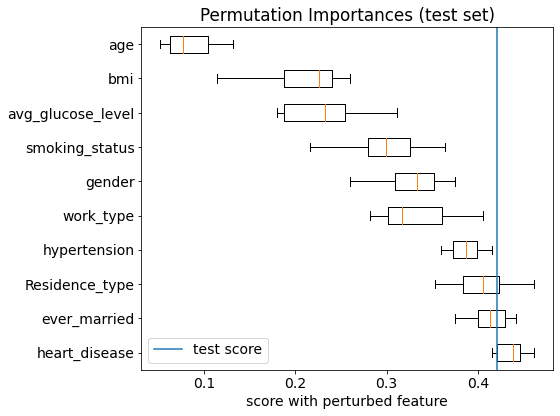

In [176]:
sorted_indcs = np.argsort(np.mean(scores,axis=1))[::-1]
print(grid.best_params_)
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,6))
plt.boxplot(scores[sorted_indcs].T,labels=ftr_names[sorted_indcs],vert=False)
plt.axvline(test_score,label='test score')
plt.title("Permutation Importances (test set)")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()
plt.show()

In [177]:
print("age",np.mean(scores[1]))
print("BMI", np.mean(scores[8]))
print("Average glucose level", np.mean(scores[7]))

age 0.08333956171591893
BMI 0.21047534938541487
Average glucose level 0.2307252151297126


## SHAP


In [178]:
import shap
shap.initjs() # required for visualizations later on
# create the explainer object with the random forest model
explainer = shap.TreeExplainer(grid.best_estimator_[1])
# transform the test set
X_test_transformed = grid.best_estimator_[0].transform(X_test)
print(np.shape(X_test_transformed))
# calculate shap values on the first 1000 points in the test
shap_values = explainer.shap_values(X_test_transformed[:982])
print(np.shape(shap_values))

(982, 22)
(982, 22)


In [121]:
print(grid.best_estimator_[0])

ColumnTransformer(transformers=[('onehot',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['work_type', 'smoking_status', 'gender',
                                  'ever_married', 'Residence_type']),
                                ('std', StandardScaler(), ['age'])])


In [179]:
feature_names = std_ftrs + list(grid.best_estimator_[0].named_transformers_['onehot'].get_feature_names(onehot_ftrs))
print(feature_names)

['age', 'bmi', 'avg_glucose_level', 'hypertension_0', 'hypertension_1', 'heart_disease_0', 'heart_disease_1', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes', 'gender_Female', 'gender_Male', 'ever_married_No', 'ever_married_Yes', 'Residence_type_Rural', 'Residence_type_Urban']


In [193]:
index = 45 # the index of the point to explain
print(explainer.expected_value) # we explain class 0 predictions
shap.force_plot(explainer.expected_value, shap_values[index,:], features = X_test_transformed[index,:], feature_names = ftr_names)

-11.185323


In [136]:
df1 = pd.DataFrame(X_test_transformed, columns = feature_names)
df1.age.value_counts

<bound method IndexOpsMixin.value_counts of 0      0.0
1      0.0
2      1.0
3      0.0
4      0.0
      ... 
977    0.0
978    1.0
979    0.0
980    0.0
981    0.0
Name: age, Length: 982, dtype: float64>

In [191]:
ddf1 = pd.DataFrame(X_test_transformed)
ddf1.head()

0    1    2    3    4    5    6    7    8    9   ...   12   13   14   15  \
0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  1.0  0.0  0.0   
1  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  1.0  0.0  0.0   
2  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  ...  0.0  1.0  0.0  0.0   
3  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  ...  0.0  0.0  1.0  1.0   
4  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0  0.0   

    16   17   18        19        20        21  
0  1.0  0.0  1.0  0.492518 -0.406538 -0.156213  
1  1.0  0.0  1.0  0.582219  0.831281  1.657075  
2  1.0  0.0  1.0  1.748327 -0.875607 -0.128351  
3  0.0  0.0  1.0 -1.794848 -0.211093 -0.273729  
4  1.0  1.0  0.0  0.447668 -0.732280 -0.599087  

[5 rows x 22 columns]

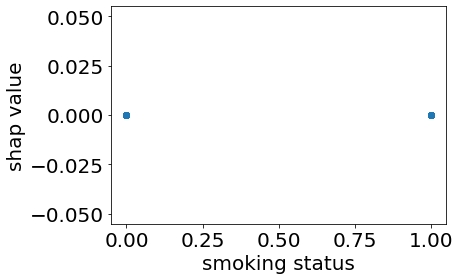

In [192]:
import matplotlib
matplotlib.rcParams.update({'font.size': 20})
ftr = 'smoking status'
indx = np.argwhere(ftr_names == "age")
plt.scatter(X_test_transformed[:982,indx],shap_values[:,indx])
plt.ylabel('shap value')
plt.xlabel(ftr)
plt.show()

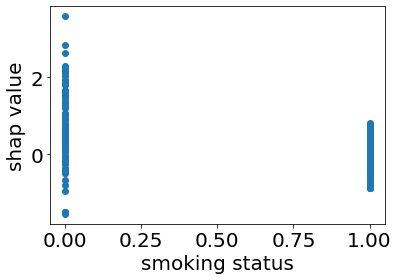

In [185]:
import matplotlib
matplotlib.rcParams.update({'font.size': 20})
ftr = 'smoking status'
indx = np.argwhere(ftr_names == "gender")
plt.scatter(X_test_transformed[:982,indx],shap_values[:,indx])
plt.ylabel('shap value')
plt.xlabel(ftr)
plt.show()